# Descrição

Teste para validar ideia de long&short usando regressão linear e desvio padrão


# Possíveis pares: 

## Setor de Energia Elétrica:

Long: AES Tietê (TIET11), Energias do Brasil (ENBR3), Energisa (ENGI11)
Short: EDP Energias do Brasil (ENBR3), Cemig (CMIG4), Light (LIGT3)

## Setor de Construção Civil:

Long: MRV Engenharia (MRVE3), Cyrela Brazil Realty (CYRE3), Eztec (EZTC3)
Short: Gafisa (GFSA3), Tecnisa (TCSA3), Even (EVEN3)

## Setor de Varejo:

Long: Magazine Luiza (MGLU3), Lojas Americanas (LAME4), B2W Digital (BTOW3)
Short: Via Varejo (VVAR3), Arezzo (ARZZ3), Hering (HGTX3)

## Setor de Bancos:

Long: Itaú Unibanco (ITUB4), Banco Bradesco (BBDC4), Banco do Brasil (BBAS3)
Short: Banco Inter (BIDI11), Banco Pan (BPAN4), Banco BMG (BMGB4)

In [36]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def stock_analysis(stock1, stock2, days):
    # Coleta as informações de estoque dos últimos 45 dias
    start_date = pd.Timestamp.today() - pd.Timedelta(days=days)
    end_date = pd.Timestamp.today()
    end_date_by_2 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/2))
    end_date_by_4 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/4))
    end_date_by_8 = pd.to_datetime(pd.Timestamp.today().normalize() - pd.Timedelta(days=days/8))
    stock1_data = yf.download(stock1, start=start_date, end=end_date)
    stock2_data = yf.download(stock2, start=start_date, end=end_date)
    # Calcula a divisão dos valores de fechamento das ações
    stock_division = stock1_data['Close'] / stock2_data['Close']
    print(end_date_by_2)
    # Calcula a regressão linear
    X = np.arange(len(stock_division)).reshape(-1, 1)
    y = stock_division.values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    linear_regression = reg.predict(X)

    # Calcula o desvio padrão
    std = stock_division.std()
    std2 = stock_division.loc[stock_division.index <= end_date_by_2].std()
    std4 = stock_division.loc[stock_division.index <= end_date_by_4].std()
    std8 = stock_division.loc[stock_division.index <= end_date_by_8].std()


    # Cria um DataFrame com os resultados
    result_df = pd.DataFrame({
        'Dia': stock_division.index,
        f'valor {stock1}': stock1_data['Close'],
        f'valor {stock2}': stock2_data['Close'],
        f'{stock1}/{stock2}': stock_division.values,
        'desvio padrão': std,
        'desvio padrão x 2': std2,
        # 'desvio padrão /4': std4,
        # 'desvio padrão /8': std8,
        'regressão linear': linear_regression.flatten(),
        # 'alpha': std / linear_regression.flatten(),
        # 'alpha /2': std2 / linear_regression.flatten(),
        # 'alpha /4': std4 / linear_regression.flatten(),
        # 'alpha /8': std8 / linear_regression.flatten()
    })

    return result_df


# Monta as combinações entre as ações

In [24]:
from itertools import combinations

lista_acoes = ['TIET11','ENBR3','ENGI11','ENBR3','CMIG4','LIGT3']

comb = combinations(lista_acoes, 2)

# imprime todas as combinações
for i in list(comb):
    if(i[0] != i[1]): # remove as combinações "iguais"
        print (i)

('TIET', 'ENBR')
('TIET', 'ENGI')
('TIET', 'ENBR')
('TIET', 'CMIG')
('TIET', 'LIGT')
('ENBR', 'ENGI')
('ENBR', 'CMIG')
('ENBR', 'LIGT')
('ENGI', 'ENBR')
('ENGI', 'CMIG')
('ENGI', 'LIGT')
('ENBR', 'CMIG')
('ENBR', 'LIGT')
('CMIG', 'LIGT')


# Análise

In [38]:
stock1 = "CPLE6.SA"
stock2 = "CMIG4.SA"

resultados = stock_analysis( stock1, stock2, 90)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00


## Buscar oportunidades por combinação de ações

In [69]:
df_oportunitys = pd.DataFrame()

def find_oportunitys(stock1, stock2, df):
    dict = {
        'STOCK1': stock1,
        'STOCK2': stock2,
        'count_upper_oportunity_days': resultados['upper_oportunity'].sum(),
        'count_down_oportunity_days': resultados['down_oportunity'].sum()
    }
    return dict
    
from itertools import combinations
lista_acoes = ['CPLE6.SA','TRPL4.SA','CMIG4.SA','USIM5.SA','EGIE3.SA','CPFE3.SA']
comb = combinations(lista_acoes, 2)

for i in list(comb):
    if(i[0] != i[1]): # remove as combinações "iguais"
        stock1 = i[0]
        stock2 = i[1]
        # print(stock1, stock2)
        resultados = stock_analysis( stock1, stock2, 90)
        resultados['dp_upper'] = resultados['regressão linear'] + resultados['desvio padrão']
        resultados['dp_down'] = resultados['regressão linear'] - resultados['desvio padrão']
        resultados['upper_oportunity'] = resultados[stock1+'/'+stock2] > resultados['dp_upper']
        resultados['down_oportunity'] = resultados[stock1+'/'+stock2] < resultados['dp_down']
        df_oportunitys = df_oportunitys.append(find_oportunitys(stock1, stock2, resultados), ignore_index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00
[*********************100%***********************]  

In [70]:
df_oportunitys

,STOCK1,STOCK2,count_upper_oportunity_days,count_down_oportunity_days
0,CPLE6.SA,TRPL4.SA,2.0,8.0
1,CPLE6.SA,CMIG4.SA,2.0,10.0
2,CPLE6.SA,USIM5.SA,14.0,10.0
3,CPLE6.SA,EGIE3.SA,3.0,7.0
4,CPLE6.SA,CPFE3.SA,10.0,7.0
5,TRPL4.SA,CMIG4.SA,13.0,10.0
6,TRPL4.SA,USIM5.SA,12.0,10.0
7,TRPL4.SA,EGIE3.SA,4.0,8.0
8,TRPL4.SA,CPFE3.SA,10.0,10.0
9,CMIG4.SA,USIM5.SA,12.0,11.0


# Plot

In [71]:
stock1 = "TRPL4.SA"
stock2 = "CMIG4.SA"

resultados = stock_analysis( stock1, stock2, 90)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2023-01-18 00:00:00


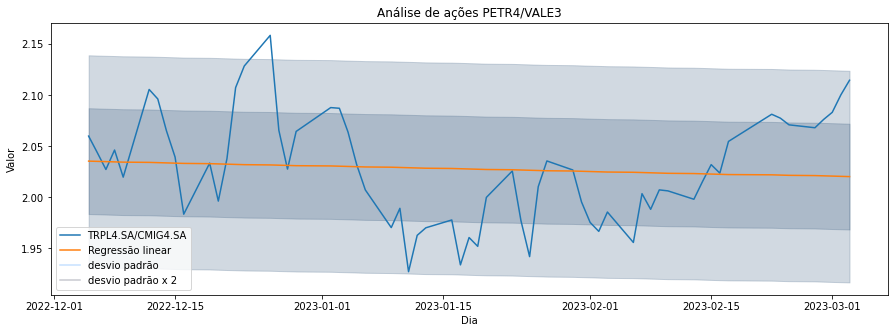

In [72]:
import matplotlib.pyplot as plt

def plot_stock_analysis(data):
    # Crie um gráfico com a divisão STOCK1/STOCK2 e a linha da regressão linear
    fig, ax = plt.subplots()
    ax.plot(data['Dia'], data[f'{stock1}/{stock2}'], label=stock1+"/"+stock2)
    ax.plot(data['Dia'], data['regressão linear'], label='Regressão linear')

    # Adicione sombras para os intervalos de alpha
    # ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /8'], data['regressão linear'] + data['alpha /8'], alpha=0.2, color='#19416b')
    # ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /4'], data['regressão linear'] + data['alpha /4'], alpha=0.2, color='#3175bd')
    # ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha /2'], data['regressão linear'] + data['alpha /2'], alpha=0.2, color='#4a94e3')
    # ax.fill_between(data['Dia'], data['regressão linear'] - data['alpha'], data['regressão linear'] + data['alpha'], alpha=0.2, color='#71b6ff')
    ax.fill_between(data['Dia'], data['regressão linear'] - 2*data['desvio padrão'], data['regressão linear'] + 2*data['desvio padrão'], alpha=0.2, color='#19416b')
    ax.fill_between(data['Dia'], data['regressão linear'] - data['desvio padrão'], data['regressão linear'] + data['desvio padrão'], alpha=0.2, color='#19416b')

    # Adicione legendas para as sombras dos intervalos de alpha
    # alpha_legend = [
    #     (data['alpha /8'], '#19416b', 'alpha/8')
    #     ,(data['alpha /4'], '#3175bd', 'alpa/4')
    #     ,(data['alpha /2'], '#4a94e3', 'alpha/2')
    #     ,(data['alpha'], '#71b6ff', 'alpha')
    # ]
    # for alpha, color, label in alpha_legend:
    #     ax.plot([], [], color=color, alpha=0.4, label=label)

    stdev_legend = [
        (data['desvio padrão'], '#71b6ff', 'desvio padrão')
        ,(data['desvio padrão x 2'], '#747a8a', 'desvio padrão x 2')
    ]
    for alpha, color, label in stdev_legend:
        ax.plot([], [], color=color, alpha=0.4, label=label)

    # Adicione legendas e rótulos aos eixos
    ax.legend()
    ax.set_xlabel('Dia')
    ax.set_ylabel('Valor')
    ax.set_title('Análise de ações PETR4/VALE3')

    # Ajuste o tamanho da figura
    fig.set_size_inches(15, 5)

    # Exiba o gráfico
    plt.show()


plot_stock_analysis(resultados)